In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from matplotlib import style
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

import os
import shutil

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split



import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import seaborn as sns


%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


import os
import shutil

import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
from torchvision import models

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from torch.utils.data import DataLoader, Subset
from collections import Counter

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras import Sequential, layers
from tensorflow.keras.preprocessing.image import load_img
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import torch.nn.functional as F



C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pip install datasets os

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\chinm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
data_path = r'C:\Projects\ProjectPnemonia'


In [4]:
data_path1 = r'C:\Projects\NATURAL'

In [5]:
batch_size = 32
num_epochs = 20
learning_rate = 0.0001
dropout = 0.1
momentum = 0.9

num_classes = 2

In [6]:
import os
image_dir = data_path

classes = os.listdir(image_dir)
print(classes)

['NORMAL', 'PNEUMONIA']


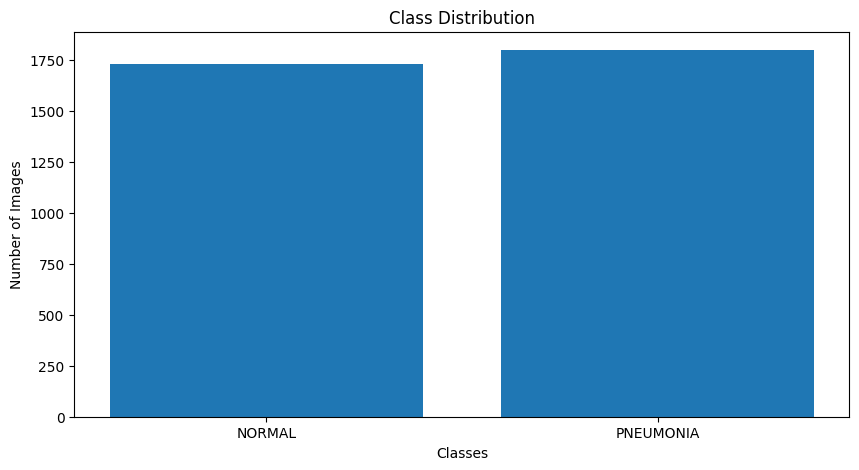

In [7]:
from collections import Counter

class_counts = Counter()
for cls in classes:
    class_dir = os.path.join(image_dir, cls)
    class_counts[cls] = len(os.listdir(class_dir))

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

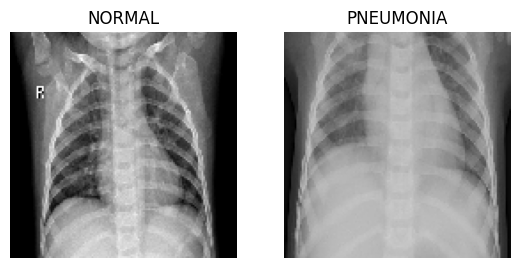

In [8]:
class_dirs = os.listdir(image_dir)
plt.figure(figsize=(10, 10))
for i, cls in enumerate(class_dirs, start=1):
    img_path = os.path.join(image_dir, cls, os.listdir(os.path.join(image_dir, cls))[0])
    img = load_img(img_path, target_size=(128, 128))
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()


In [9]:
img_size = 256
batch_size = 32

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    shuffle=True,
    image_size = (img_size,img_size),
    batch_size = batch_size,
    labels='inferred',
    label_mode='int'
)

Found 3534 files belonging to 2 classes.


In [11]:
class_names = dataset.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [12]:
def split_dataset(ds, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, shuffle=True):
 
    dataset_size = len(ds)

    
    train_size = int(train_ratio * dataset_size)
    val_size = int(val_ratio * dataset_size)
    test_size = dataset_size - train_size - val_size

    
    if shuffle:
        ds = ds.shuffle(dataset_size)

    
    train_dataset = ds.take(train_size)
    val_dataset = ds.skip(train_size).take(val_size)
    test_dataset = ds.skip(train_size + val_size).take(test_size)

    return train_dataset, val_dataset, test_dataset

In [13]:
train_ds, val_ds, test_ds = split_dataset(dataset)


In [14]:
for i in [train_ds, val_ds, test_ds]:
    print(len(i))


88
11
12


In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_size, img_size),     
    tf.keras.layers.Rescaling(1.0/255)     
])

In [17]:
data_augmentation = tf.keras.Sequential([
    keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    keras.layers.RandomBrightness(0.1),
    keras.layers.RandomContrast(0.1),
])

In [18]:
torch.cuda.empty_cache()
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.cnn_layer_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.cnn_layer_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d(2, 2)

        self.linear_layer_1 = nn.Linear(32 * 64 * 64, 1024)
        self.linear_layer_2 = nn.Linear(1024, 512)
        self.linear_layer_3 = nn.Linear(512, num_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.cnn_layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.maxpool(x)

        x = self.cnn_layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.maxpool(x)

        x = self.flatten(x)

        x = self.linear_layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.linear_layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.linear_layer_3(x)
        return x


model = CNNModel(num_classes)
print(model)

CNNModel(
  (cnn_layer_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn_layer_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear_layer_1): Linear(in_features=131072, out_features=1024, bias=True)
  (linear_layer_2): Linear(in_features=1024, out_features=512, bias=True)
  (linear_layer_3): Linear(in_features=512, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [19]:
pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\chinm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
from torchsummary import summary
import torch


model = CNNModel(num_classes)


input_size = (3, 256, 256)  


summary(model, input_size=input_size, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             448
              ReLU-2         [-1, 16, 256, 256]               0
           Dropout-3         [-1, 16, 256, 256]               0
         MaxPool2d-4         [-1, 16, 128, 128]               0
            Conv2d-5         [-1, 32, 128, 128]           4,640
              ReLU-6         [-1, 32, 128, 128]               0
           Dropout-7         [-1, 32, 128, 128]               0
         MaxPool2d-8           [-1, 32, 64, 64]               0
           Flatten-9               [-1, 131072]               0
           Linear-10                 [-1, 1024]     134,218,752
             ReLU-11                 [-1, 1024]               0
          Dropout-12                 [-1, 1024]               0
           Linear-13                  [-1, 512]         524,800
             ReLU-14                  [

In [21]:
pip install --upgrade pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\chinm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
from PIL import Image


def resize_image(src_image, size=(128,128), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    
    src_image.thumbnail(size, Image.ANTIALIAS)
    
    
    new_image = Image.new("RGB", size, bg_color)
    
  
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
  
   
    return new_image

In [23]:
import os
import shutil
from PIL import Image


def resize_image(image, size):
    return image.resize(size, Image.BICUBIC)


training_folder_name = data_path
train_folder = data_path1


if os.path.exists(train_folder):
    shutil.rmtree(train_folder)


print('Transforming images...')
for root, folders, files in os.walk(training_folder_name):
    for sub_folder in folders:
        print('processing folder ' + sub_folder)
        
        saveFolder = os.path.join(train_folder, sub_folder)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        
        file_names = os.listdir(os.path.join(root, sub_folder))
        for file_name in file_names:
            
            file_path = os.path.join(root, sub_folder, file_name)
            image = Image.open(file_path)
            
            resized_image = resize_image(image, (128, 128))  
            saveAs = os.path.join(saveFolder, file_name)
            resized_image.save(saveAs)

print('Done.')


Transforming images...
processing folder NORMAL
processing folder PNEUMONIA
Done.


In [24]:
def load_dataset(data_path):
    import torch
    import torchvision
    import torchvision.transforms as transforms

    transformation = transforms.Compose([

        transforms.RandomHorizontalFlip(0.5),
            
        transforms.RandomVerticalFlip(0.3),
      
        transforms.ToTensor(),
        
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])


    full_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transformation
    )

    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
  
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
        
    return train_loader, test_loader


train_folder = data_path1

train_loader, test_loader = load_dataset(train_folder)
batch_size = train_loader.batch_size
print("Data loaders ready to read", train_folder)

Data loaders ready to read C:\Projects\NATURAL


In [25]:
torch.cuda.empty_cache()


class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.cnn_layer_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.cnn_layer_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d(2, 2)

        self.linear_layer_1 = nn.Linear(32 * 64 * 64, 1024)
        self.linear_layer_2 = nn.Linear(1024, 512)
        self.linear_layer_3 = nn.Linear(512, num_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.cnn_layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.maxpool(x)

        x = self.cnn_layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.maxpool(x)

        x = self.flatten(x)

        x = self.linear_layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.linear_layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.linear_layer_3(x)
        return x


cnn_model = CNNModel(num_classes)
print(cnn_model)

CNNModel(
  (cnn_layer_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn_layer_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear_layer_1): Linear(in_features=131072, out_features=1024, bias=True)
  (linear_layer_2): Linear(in_features=1024, out_features=512, bias=True)
  (linear_layer_3): Linear(in_features=512, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [26]:
from torchsummary import summary
import torch

model = CNNModel(num_classes)

input_size = (3, 256, 256)  

summary(model, input_size=input_size, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             448
              ReLU-2         [-1, 16, 256, 256]               0
           Dropout-3         [-1, 16, 256, 256]               0
         MaxPool2d-4         [-1, 16, 128, 128]               0
            Conv2d-5         [-1, 32, 128, 128]           4,640
              ReLU-6         [-1, 32, 128, 128]               0
           Dropout-7         [-1, 32, 128, 128]               0
         MaxPool2d-8           [-1, 32, 64, 64]               0
           Flatten-9               [-1, 131072]               0
           Linear-10                 [-1, 1024]     134,218,752
             ReLU-11                 [-1, 1024]               0
          Dropout-12                 [-1, 1024]               0
           Linear-13                  [-1, 512]         524,800
             ReLU-14                  [

In [27]:
#first option
from torch.nn.modules.conv import F


class Net(nn.Module):
    
    
    
    def __init__(self, num_classes=3):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        
        
        self.pool = nn.MaxPool2d(kernel_size=2)
        
   
        self.drop = nn.Dropout2d(p=0.2)

        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):

        x = F.relu(self.pool(self.conv1(x))) 
        
      
        x = F.relu(self.pool(self.conv2(x)))  
        
 
        x = F.dropout(self.drop(x), training=self.training)
        
        
        x = x.view(-1, 32 * 32 * 24)
   
        x = self.fc(x)
 
        return torch.log_softmax(x, dim=1)
    
device = "cpu"
if (torch.cuda.is_available()):

    device = "cuda"


model = Net(num_classes=len(classes)).to(device)

print(model)


Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=24576, out_features=2, bias=True)
)


In [28]:
def train(model, device, train_loader, optimizer, epoch):
    
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    
    for batch_idx, (data, target) in enumerate(train_loader):
       
        data, target = data.to(device), target.to(device)
        
    
        optimizer.zero_grad()
        
        
        output = model(data)
        
        
        loss = loss_criteria(output, target)

        
        train_loss += loss.item()
        

        loss.backward()
        optimizer.step()
        
    
        print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            

    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [29]:
def test(model, device, test_loader):
    
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            
            output = model(data)
            
            
            test_loss += loss_criteria(output, target).item()
            
            
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    return avg_loss

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim



optimizer = optim.Adam(model.parameters(), lr=0.0001)


loss_criteria = nn.CrossEntropyLoss()


epoch_nums = []
training_loss = []
validation_loss = []


epochs = 100
print('Training on', device)

best_validation_loss = float('inf')
best_model_state = None

for epoch in range(1, epochs + 1):
    
    train_loss = train(model, device, train_loader, optimizer, epoch)

    
    test_loss = test(model, device, test_loader)

    
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

    
    if test_loss < best_validation_loss:
        best_validation_loss = test_loss
        best_model_state = model.state_dict()


torch.save(best_model_state, 'best_model.pth')

Training on cuda
Epoch: 1
	Training batch 1 Loss: 0.689338
	Training batch 2 Loss: 0.695345
	Training batch 3 Loss: 0.709733
	Training batch 4 Loss: 0.682411
	Training batch 5 Loss: 0.685686
	Training batch 6 Loss: 0.688765
	Training batch 7 Loss: 0.677416
	Training batch 8 Loss: 0.663019
	Training batch 9 Loss: 0.676178
	Training batch 10 Loss: 0.688072
	Training batch 11 Loss: 0.668386
	Training batch 12 Loss: 0.677872
	Training batch 13 Loss: 0.666647
	Training batch 14 Loss: 0.658600
	Training batch 15 Loss: 0.658247
	Training batch 16 Loss: 0.637049
	Training batch 17 Loss: 0.654812
	Training batch 18 Loss: 0.633070
	Training batch 19 Loss: 0.645767
	Training batch 20 Loss: 0.653810
	Training batch 21 Loss: 0.631313
	Training batch 22 Loss: 0.646948
	Training batch 23 Loss: 0.646536
	Training batch 24 Loss: 0.643795
	Training batch 25 Loss: 0.595363
	Training batch 26 Loss: 0.608633
	Training batch 27 Loss: 0.624786
	Training batch 28 Loss: 0.602069
	Training batch 29 Loss: 0.6224

In [31]:
best_model =  Net(num_classes=len(classes)).to(device)
best_model.load_state_dict(torch.load('best_model.pth'))
best_model.eval()

Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=24576, out_features=2, bias=True)
)

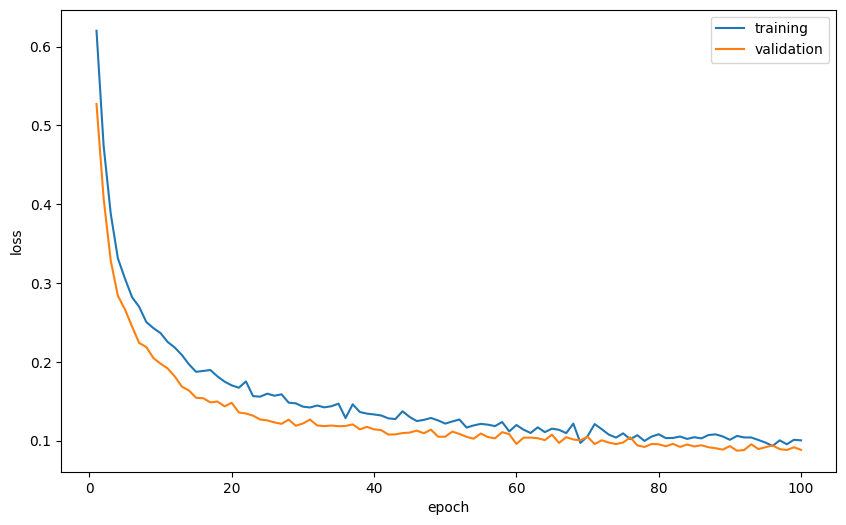

In [32]:
plt.figure(figsize=(10,6))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Getting predictions from the test set...


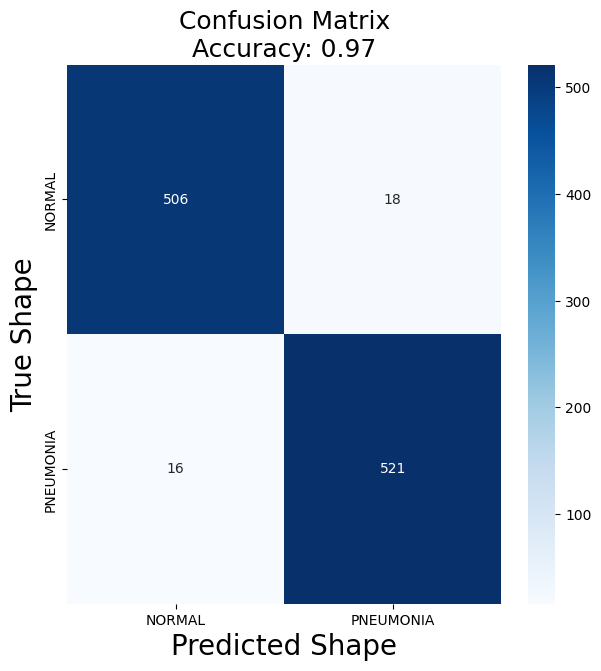

In [33]:
from sklearn.metrics import accuracy_score


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

truelabels = []
predictions = []
model.eval()

print("Getting predictions from the test set...")
for data, target in test_loader:
    data = data.to(device) 
    for label in target.data.numpy():
        truelabels.append(label)
    for prediction in model(data).data.cpu().numpy().argmax(1):
        predictions.append(prediction) 


accuracy = accuracy_score(truelabels, predictions)


...



cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(classes))

df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(7, 7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize=20)
plt.ylabel("True Shape", fontsize=20)

plt.title(f"Confusion Matrix\nAccuracy: {accuracy:.2f}", fontsize=18)

plt.show()

In [34]:
accuracy

0.9679547596606974

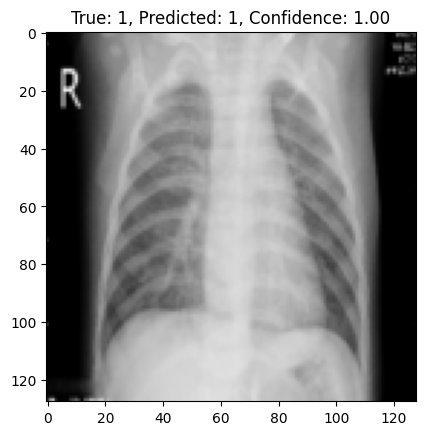

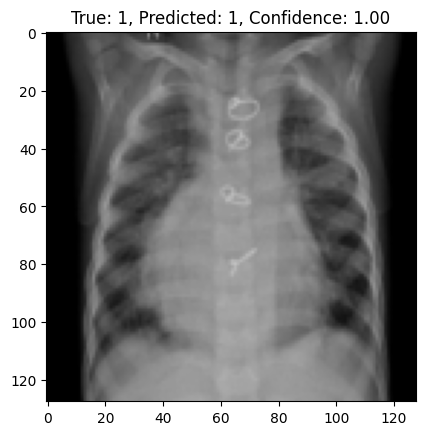

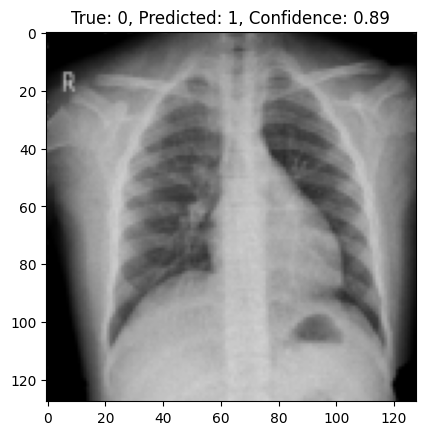

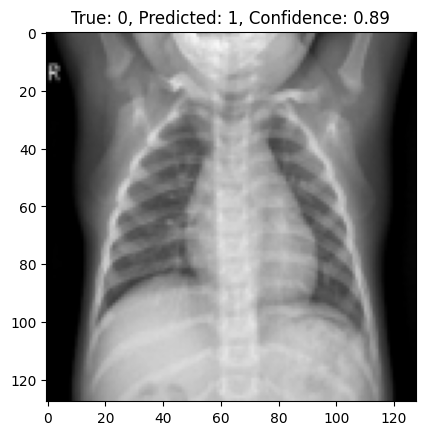

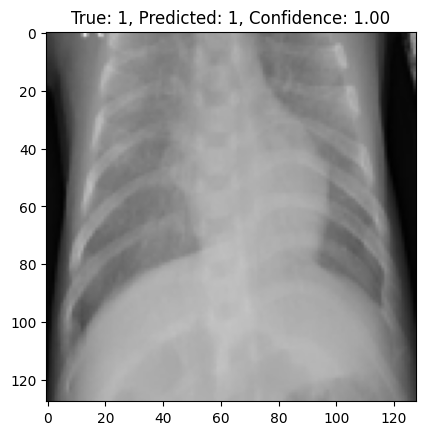

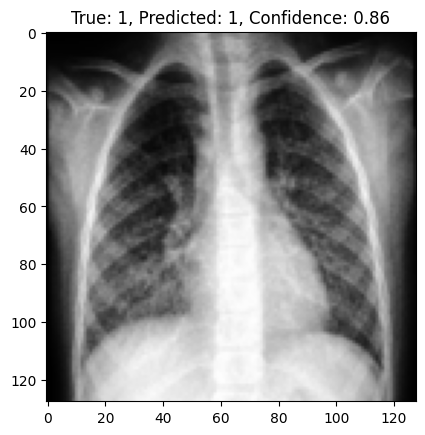

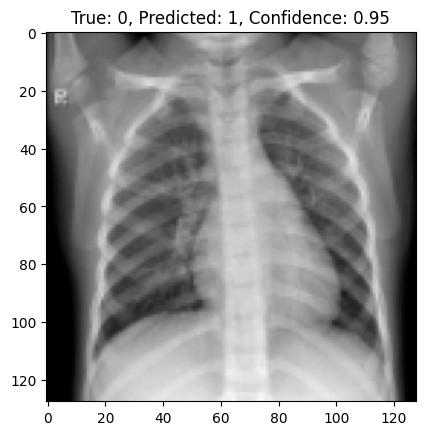

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


train_dataset = datasets.ImageFolder(data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
def get_random_samples(dataset, sample_size):
    random_indices = random.sample(range(len(dataset)), sample_size)
    samples = [dataset[i] for i in random_indices]
    return samples

sample_size = 7


samples = get_random_samples(train_dataset, sample_size)


sample_images = torch.stack([sample[0] for sample in samples]) 
sample_labels = [sample[1] for sample in samples]  


device = "cuda" if torch.cuda.is_available() else "cpu"
sample_images = sample_images.to(device)


model.eval()
with torch.no_grad():
    outputs = model(sample_images)
    probabilities = torch.exp(outputs)  
    confidence, predicted_classes = torch.max(probabilities, 1)
    
confidence = confidence.cpu().numpy()
predicted_classes = predicted_classes.cpu().numpy()


for i in range(sample_size):
    image = sample_images[i].cpu().numpy().transpose((1, 2, 0)) 
    label = sample_labels[i]
    predicted = predicted_classes[i]
    conf = confidence[i]
    
    plt.imshow(image)
    plt.title(f"True: {label}, Predicted: {predicted}, Confidence: {conf:.2f}")
    plt.show()


In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create a random image
image_path = r"C:\Projects\ProjectPnemonia\PNEUMONIA\PNEUMONIA.png"
original_image = Image.open(image_path)
original_image = original_image.resize((128, 128))  # Resize to match expected input size
original_image = np.array(original_image).astype(np.float32) / 255.0
# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    tf.keras.layers.RandomBrightness(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

# Apply each augmentation separately
augmented_images = {
    "Random Flip": tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")(original_image[None, ...])[0],
    "Random Rotation": tf.keras.layers.RandomRotation(0.2)(original_image[None, ...])[0],
    "Random Zoom": tf.keras.layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2))(original_image[None, ...])[0],
    "Random Contrast": tf.keras.layers.RandomContrast(0.1)(original_image[None, ...])[0],
}




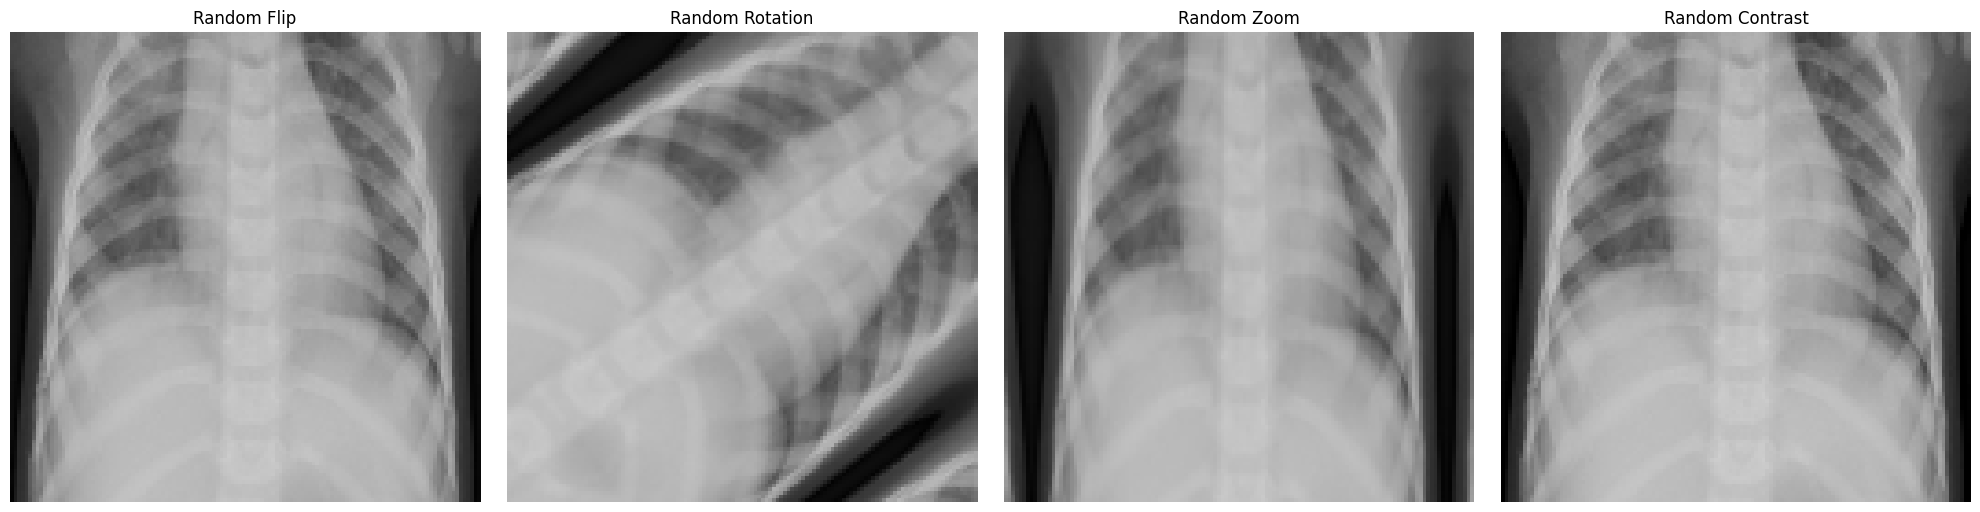

In [37]:
import matplotlib.pyplot as plt

# Adjust the figure size as needed
plt.figure(figsize=(25, 5))

# Plot the images in a single row
for i, (title, img) in enumerate(augmented_images.items()):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
